In [1]:
from config import get_args
from tqdm import tqdm
from model import *
from data_loader import PushDataLoader
from pixyz_utils import save_model,load_model
from torch.utils.tensorboard import SummaryWriter
import torch
import os
import matplotlib.pyplot as plt

In [2]:
device = 3

SEED = 0
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

args = get_args(jupyter=True, args=["--model", "SSM16", "--s_dim", "64", "--epoch", "1"])
print(args)
model = SSM(args, device)

path = os.path.join("model", "SSM", "Jan21_01-16-15")
restore_distributions = [model.priors[0], model.posteriors[0], model.encoders[0], model.decoders[0]]
for i, dist in enumerate(restore_distributions):
    dist.load_state_dict(torch.load(os.path.join(path, "dist" + str(i) + ".pt")))

model1 = model

args = get_args(jupyter=True, args=["--model", "SSM16", "--s_dim", "64", "512", "--epoch", "1"])
print(args)
model = SSM(args, device)

path = os.path.join("model", "SSM", "Jan21_01-16-15")
restore_distributions = [model.priors[0], model.posteriors[0], model.encoders[0], model.decoders[0]]
for i, dist in enumerate(restore_distributions):
    dist.load_state_dict(torch.load(os.path.join(path, "dist" + str(i) + ".pt")))

path = os.path.join("model", "Jan22_03-57-33_SSM16_s64-512_ac6311e", "Jan27_07-50-02")
restore_distributions = [model.priors[1], model.posteriors[1], model.encoders[1], model.decoders[1]]
for i, dist in enumerate(restore_distributions):
    dist.load_state_dict(torch.load(os.path.join(path, "dist" + str(i) + ".pt")))
    
model2 = model

Namespace(B=32, T=10, a_dim=4, comment=None, data_dir='~/tensorflow_datasets/', device_ids=[0], epochs=1, gamma=1e-05, h_dim=1024, log_dir='../runs/Jan27_19-59-08_SSM16_s64_1226eee', min_stddev=0.0, model='SSM16', resume=False, resume_epoch=None, resume_itr=None, resume_name=None, resume_time=None, runs_dir='../runs/', s_dim=[64], seed=0)
64
[4]
---- init weights ----
   <class 'torch.nn.modules.container.ModuleList'>
   <class 'core.Prior'>
ok <class 'torch.nn.modules.linear.Linear'>
ok <class 'torch.nn.modules.linear.Linear'>
ok <class 'torch.nn.modules.linear.Linear'>
   <class 'core.Posterior'>
ok <class 'torch.nn.modules.linear.Linear'>
ok <class 'torch.nn.modules.linear.Linear'>
ok <class 'torch.nn.modules.linear.Linear'>
   <class 'core.Encoder'>
ok <class 'torch.nn.modules.conv.Conv2d'>
ok <class 'torch.nn.modules.conv.Conv2d'>
ok <class 'torch.nn.modules.conv.Conv2d'>
ok <class 'torch.nn.modules.conv.Conv2d'>
   <class 'core.Decoder'>
ok <class 'torch.nn.modules.linear.Linear'

In [66]:
def show(ii, kk):
    ylabel = ["  True", "  64", "  64 + 512"]
    args.T = 10
    test_loader = PushDataLoader("test", args)

    for i, batch in enumerate(test_loader):
        if not i == ii:
            continue

        x, a, itr = batch
        _B = x.size(0)
        x = x.to(device).transpose(0, 1)  # T,B,3,28,28
        a = a.to(device).transpose(0, 1)  # T,B,1

        feed_dict = {"x0": x[0].clone(), "x": x, "a": a}

        video1 = model1.sample_x(feed_dict)
        video1 = video1.to("cpu").numpy()
        video2 = model2.sample_x(feed_dict)
        video2 = video2.to("cpu").numpy()

        for k in list(range(0, 8)) + list(range(16, 24)) + list(range(32, 40)) + list(range(48, 56)):
            if not k == kk:
                continue
            fig = plt.figure(figsize=(12, 12))

            subplot = fig.add_subplot(6, 6, 1)
            subplot.set_xticks([])
            subplot.set_yticks([])
            plt.title("( t = 0 )", fontsize=14)
            plt.ylabel(ylabel[0], fontsize=16)
            subplot.imshow(video1[k,0].transpose(1,2,0))
            for t in range(10):
                subplot = fig.add_subplot(6, 6, t+2 + t // 5)
                subplot.set_xticks([])
                subplot.set_yticks([])
                plt.title("t = {}".format(t+1), fontsize=14)
                subplot.imshow(video1[k,t].transpose(1,2,0))

            subplot = fig.add_subplot(6, 6, 13)
            subplot.set_xticks([])
            subplot.set_yticks([])
            plt.title("( t = 0 )", fontsize=14)
            plt.ylabel(ylabel[1], fontsize=16)
            subplot.imshow(video1[k+8,0].transpose(1,2,0))
            for t in range(10):
                subplot = fig.add_subplot(6, 6, t+14 + t // 5)
                subplot.set_xticks([])
                subplot.set_yticks([])
                plt.title("t = {}".format(t+1), fontsize=14)
                subplot.imshow(video1[k+8,t].transpose(1,2,0))

            subplot = fig.add_subplot(6, 6, 25)
            subplot.set_xticks([])
            subplot.set_yticks([])
            plt.title("( t = 0) ", fontsize=14)
            plt.ylabel(ylabel[2], fontsize=16)
            subplot.imshow(video2[k+8,0].transpose(1,2,0))
            for t in range(10):
                subplot = fig.add_subplot(6, 6, t+26 + t // 5)
                subplot.set_xticks([])
                subplot.set_yticks([])
                plt.title("t = {}".format(t+1), fontsize=14)
                subplot.imshow(video2[k+8,t].transpose(1,2,0))

            plt.show()

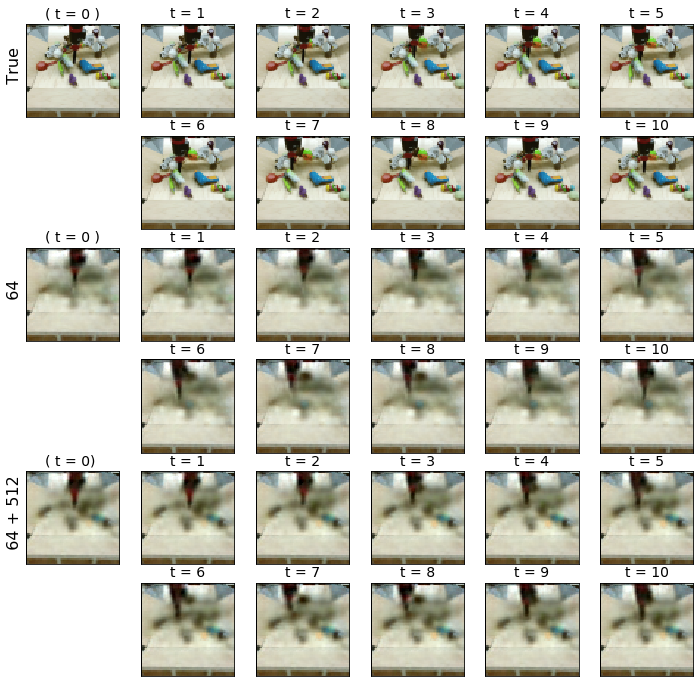

In [67]:
show(6, 19)

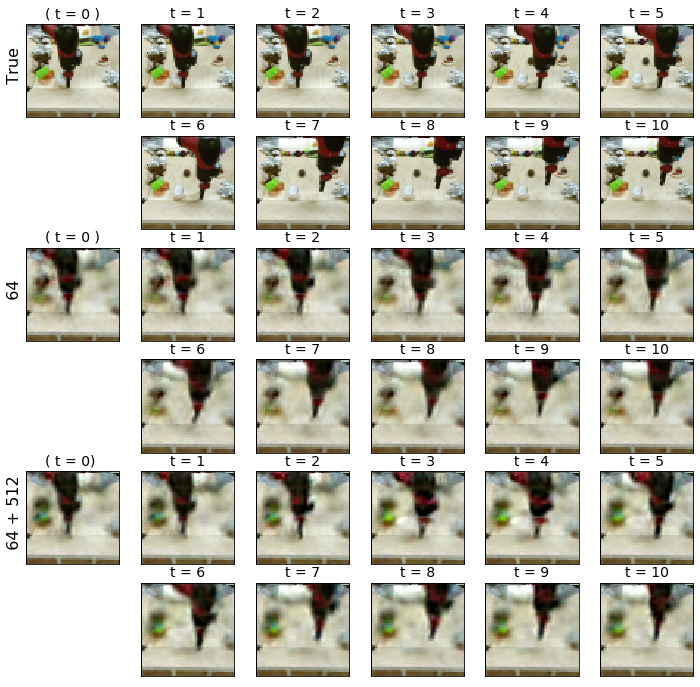

In [68]:
show(5, 35)

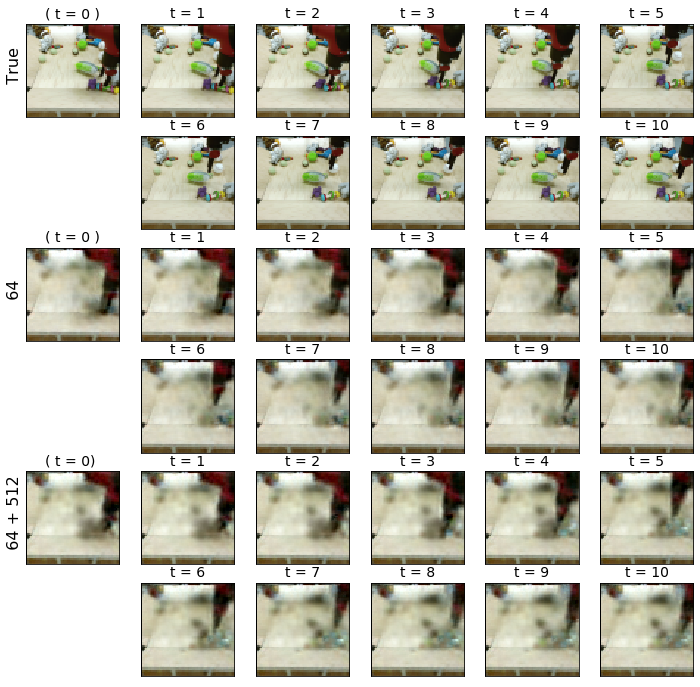

In [69]:
show(1, 16)

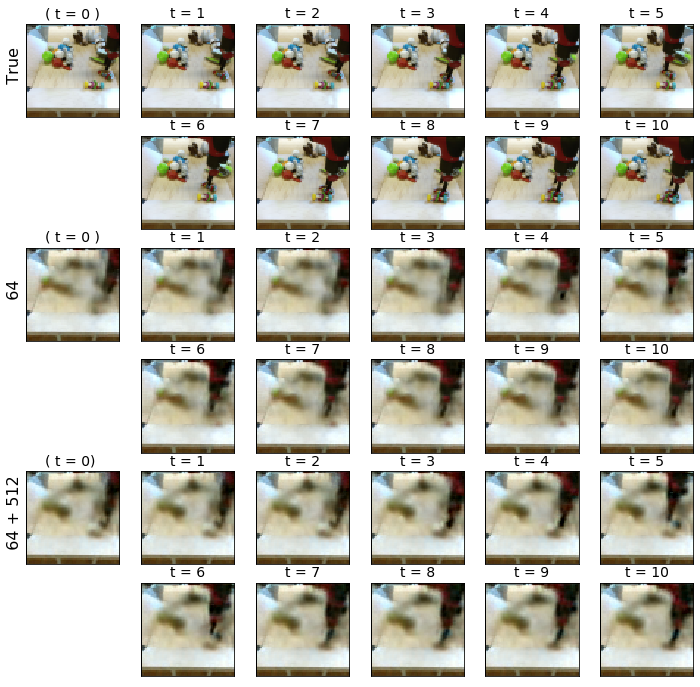

In [70]:
show(1, 18)

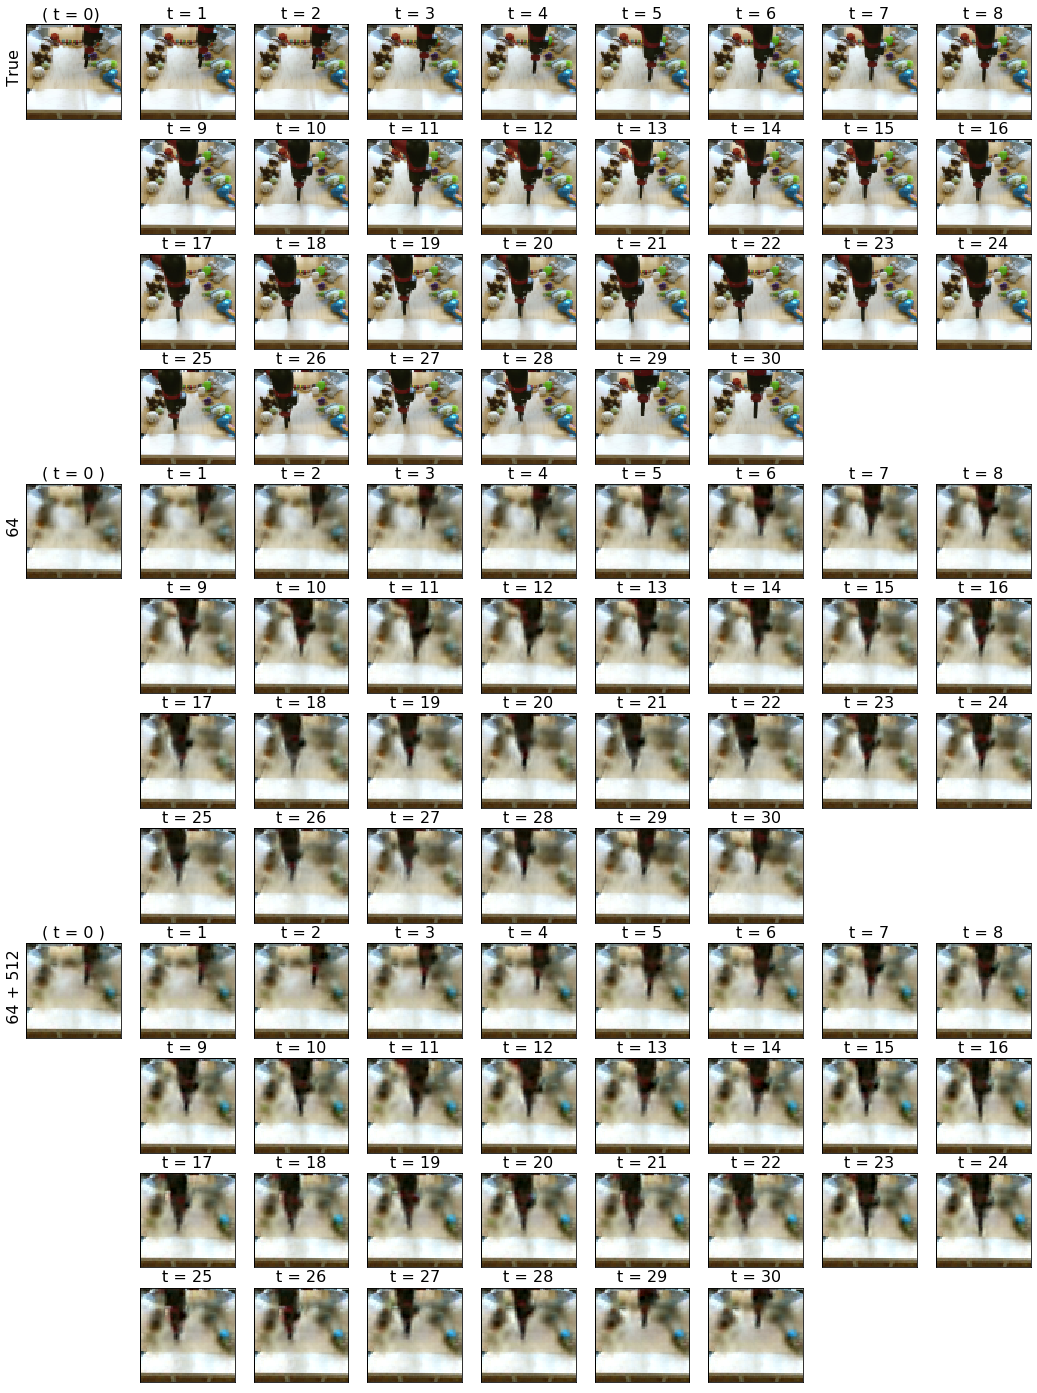

In [33]:
args.T = 30
test_loader = PushDataLoader("test", args)
ylabel = ["  True", "  64", "  64 + 512"]

for i, batch in enumerate(test_loader):
    if not i == 2:
        continue

    x, a, itr = batch
    _B = x.size(0)
    x = x.to(device).transpose(0, 1)  # T,B,3,28,28
    a = a.to(device).transpose(0, 1)  # T,B,1

    feed_dict = {"x0": x[0].clone(), "x": x, "a": a}
    
    video1 = model1.sample_x(feed_dict)
    video1 = video1.to("cpu").numpy()
    video2 = model2.sample_x(feed_dict)
    video2 = video2.to("cpu").numpy()

    for k in list(range(0, 8)) + list(range(16, 24)) + list(range(32, 40)) + list(range(48, 56)):
        if not k == 39:
            continue
        fig = plt.figure(figsize=(18, 24 + 1))

        subplot = fig.add_subplot(12, 9, 1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        plt.title("( t = 0) ", fontsize=16)
        plt.ylabel(ylabel[0], fontsize=16)
        subplot.imshow(video1[k,0].transpose(1,2,0))
        for t in range(30):
            subplot = fig.add_subplot(12, 9, t+2 + t // 8)
            subplot.set_xticks([])
            subplot.set_yticks([])
            plt.title("t = {}".format(t+1), fontsize=16)
            subplot.imshow(video1[k,t].transpose(1,2,0))

        subplot = fig.add_subplot(12, 9, 37)
        subplot.set_xticks([])
        subplot.set_yticks([])
        plt.title("( t = 0 )", fontsize=16)
        plt.ylabel(ylabel[1], fontsize=16)
        subplot.imshow(video1[k+8,0].transpose(1,2,0))
        for t in range(30):
            subplot = fig.add_subplot(12, 9, t+38 + t // 8)
            subplot.set_xticks([])
            subplot.set_yticks([])
            plt.title("t = {}".format(t+1), fontsize=16)
            subplot.imshow(video1[k+8,t].transpose(1,2,0))

        subplot = fig.add_subplot(12, 9, 73)
        subplot.set_xticks([])
        subplot.set_yticks([])
        plt.title("( t = 0 )", fontsize=16)
        plt.ylabel(ylabel[2], fontsize=16)
        subplot.imshow(video2[k+8,0].transpose(1,2,0))
        for t in range(30):
            subplot = fig.add_subplot(12, 9, t+74 + t // 8)
            subplot.set_xticks([])
            subplot.set_yticks([])
            plt.title("t = {}".format(t+1), fontsize=16)
            subplot.imshow(video2[k+8,t].transpose(1,2,0))

        plt.show()